# Project 5: Random Forests

## Rebecca Gartenberg, Marc Gottlieb and Sophie Jaro

In this project, regression models created from both random forest and gradient boosting tree methods are compared. Models of various depths are created and compared. The analysis is done on two datasets: California Housing and Crime in Communities. 

In [1]:
# Load Modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [2]:
# Import California Housing Dataset
california_data = pd.read_csv (r'CaliforniaHousing.csv') # https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html
california_feature_names = ['Intercept','longitude','latitude', 'households', 'population', 'total bedrooms', 'total rooms', 'housing median age', 'median income']
display(california_data)

,longitude,latitude,households,population,total bedrooms,total rooms,housing median age,median income,median house value
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700


# Methods
Cleaning the data:
For the California Housing data, both the features and labels were normalized. The Crime in Communities data was already normalized so we used it as is.

Running the models:
The sci-kit learn module is used to build and train all the models. 
Random forests build many independent trees based on a random subset of the data, and average all of the trees for optimal results at the end.
Gradient boosted trees build one tree at a time, using each tree to improve the results of the previous tree.

To compare these regression models, a plot of Average Absolute Error versus Number of Iterations was obtained for random forests of depth 2 and 6 and gradient-boosted trees of lengths 4 and 6. Also, relative feature importance was plotted for each of these models.



In [13]:
### Function to clean data

def clean_data(data):

  # Make data an array
  data_array = np.array(data)

  # Randomize the data array
  np.random.shuffle(data_array)
  p = len(data_array[1])-1

  # Separate into features and labels
  features = data_array[:,0:p]
  labels = data_array[:,p]

  # Normalize each data set features (normalize by subtracting the mean then dividing by variance per feature)
  #for i in range(0,len(features[1])):
  #  features[:,i] = ((features[:,i]-np.mean(features[:,i]))/np.sqrt(np.var(features[:,i])))

  # Normalize each data set features (normalize by subtracting the mean then dividing by variance per feature)
  #labels = ((labels-np.mean(labels))/np.sqrt(np.var(labels)))

  # Adding ones column to find intercept 
  ones_col = np.ones(len(features))
  features = np.insert(features, 0, ones_col, axis=1)
  
  return features, labels

In [4]:
california_features, california_labels = clean_data(california_data)
X_train, X_test, y_train, y_test = train_test_split(california_features, california_labels, test_size=0.2, shuffle=True)

In [5]:
# Computing Absolute Error for Number of Iterations
num_iterations = 250
NE = np.linspace(1,num_iterations,num_iterations)

MAE_vec_RF_m2 = np.zeros(num_iterations)
MAE_vec_RF_m6 = np.zeros(num_iterations)
MAE_vec_GB_depth4 = np.zeros(num_iterations)
MAE_vec_GB_depth6 = np.zeros(num_iterations)

for ne in NE:
  
  ne = int(ne)

  # Random Forest with depth m = 2 (# of trees)
  RF_m2 = RandomForestRegressor(n_estimators=ne, max_features=2)

  # Random Forest with depth m = 6
  RF_m6 = RandomForestRegressor(n_estimators=ne, max_features=6)

  # Gradient Boosting with depth 4
  GB_depth4 = GradientBoostingRegressor(n_estimators=ne, max_depth=4, learning_rate=0.05)

  # Gradient boosting with depth 6
  GB_depth6 = GradientBoostingRegressor(n_estimators=ne, max_depth=6, learning_rate=0.05)

  RF_m2.fit(X_train, y_train)
  RF_m6.fit(X_train, y_train)
  GB_depth4.fit(X_train, y_train)
  GB_depth6.fit(X_train, y_train)

  y_pred_RF_m2 = RF_m2.predict(X_test)
  y_pred_RF_m6 = RF_m6.predict(X_test)
  y_pred_GB_depth4 = GB_depth4.predict(X_test)
  y_pred_GB_depth6 = GB_depth6.predict(X_test)

  MAE_vec_RF_m2[ne-1] = np.sum(np.abs(y_test - y_pred_RF_m2))/len(y_pred_RF_m2)
  MAE_vec_RF_m6[ne-1] = np.sum(np.abs(y_test - y_pred_RF_m6))/len(y_pred_RF_m6)
  MAE_vec_GB_depth4[ne-1] = np.sum(np.abs(y_test - y_pred_GB_depth4))/len(y_pred_GB_depth4)
  MAE_vec_GB_depth6[ne-1] = np.sum(np.abs(y_test - y_pred_GB_depth6))/len(y_pred_GB_depth6)



# California Housing AAE v. Num_Iter Plot





<Figure size 432x288 with 0 Axes>

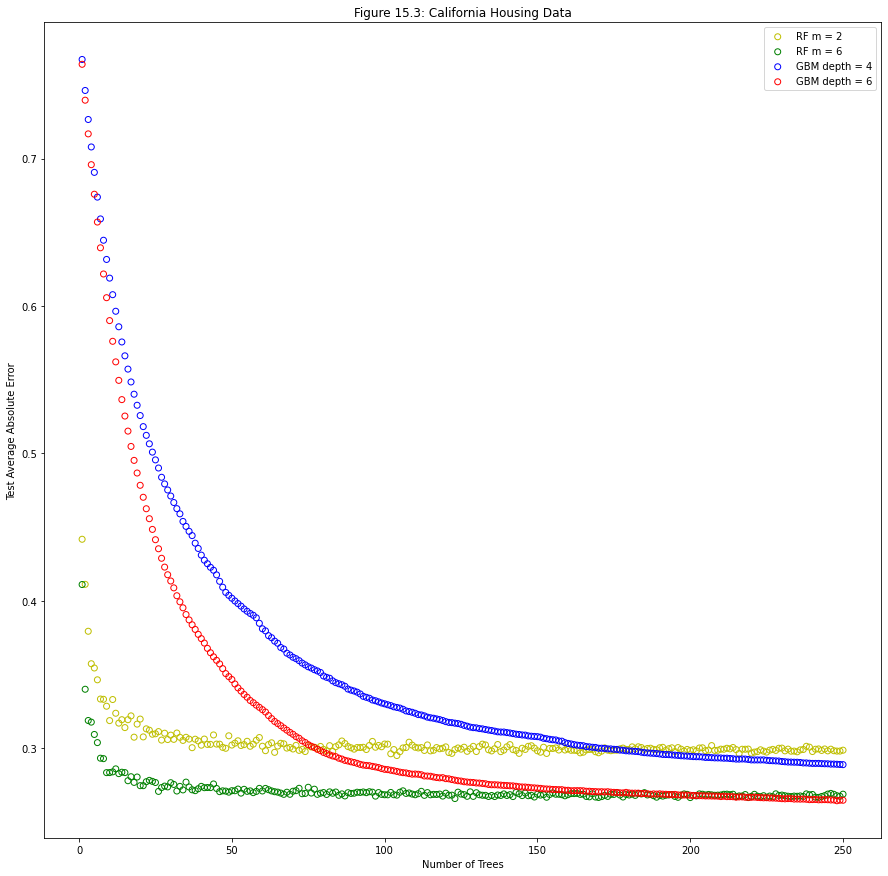

In [6]:
# Plotting Training and Testing Absolute Error
plt.figure(1)
plt.figure(figsize=(15,15))
plt.scatter(NE,MAE_vec_RF_m2,color='none',edgecolors='y')
plt.scatter(NE,MAE_vec_RF_m6,color='none',edgecolors='g')
plt.scatter(NE,MAE_vec_GB_depth4,color='none',edgecolors='b')
plt.scatter(NE,MAE_vec_GB_depth6,color='none',edgecolors='r')

plt.title('Figure 15.3: California Housing Data')
plt.xlabel('Number of Trees')
plt.ylabel('Test Average Absolute Error')
plt.legend(['RF m = 2','RF m = 6', 'GBM depth = 4', 'GBM depth = 6'])
plt.show()

# Analysis of AEE v Num_Iter Plot for California Housing Data

####Compare RF 2 to RF 6
The random forest regression with m = 2 converges quickly to a high and constant AAE of approximately .48. On the other hand, the random forest regression with m = 6 converges quickly to an AAE of approximately 0.41. This matches the prediction that a random forest with greater depth will result in more accurate predictions on average. 

####Compare GB 4 to GB 6
The regression created with gradient boosted trees of length 4 converge slowly to an AAE of approximately 0.32. The regression created with gradient boosted trees of length 6 converge slowly to an AAE of approximately 0.28. This result matches the prediction that gradient boosted trees of greater depth produce a regression that more accurately predict the labels. 

####Compare RF to GB general
Boosted models outperform forest models. Both gradient boosted tree models resulted in a significantly lower AAE than the random forest models. The AAE of random forests models do not improve with the number of iterations. As expected, the AAE for random forests is more dependent on value of m than number of iterations. On the other hand, the AAE of gradient boosted tree models decreases as the number of iterations increases. The AAE of the gradient boosted tree models is very sensitive to the number of iterations. 

# California Housing Feature Importance Plots

In [15]:

# Random Forest with depth m = 2 (# of trees)
RF_m2 = RandomForestRegressor(n_estimators=250, max_features=2)
RF_m2.fit(X_train, y_train)

# Random Forest with depth m = 6
RF_m6 = RandomForestRegressor(n_estimators=250, max_features=6)
RF_m6.fit(X_train, y_train)

# Gradient Boosting with depth 4
GB_depth4 = GradientBoostingRegressor(n_estimators=250, max_depth=4, learning_rate=0.05)
GB_depth4.fit(X_train, y_train)

# Gradient boosting with depth 6
GB_depth6 = GradientBoostingRegressor(n_estimators=250, max_depth=6, learning_rate=0.05)
GB_depth6.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

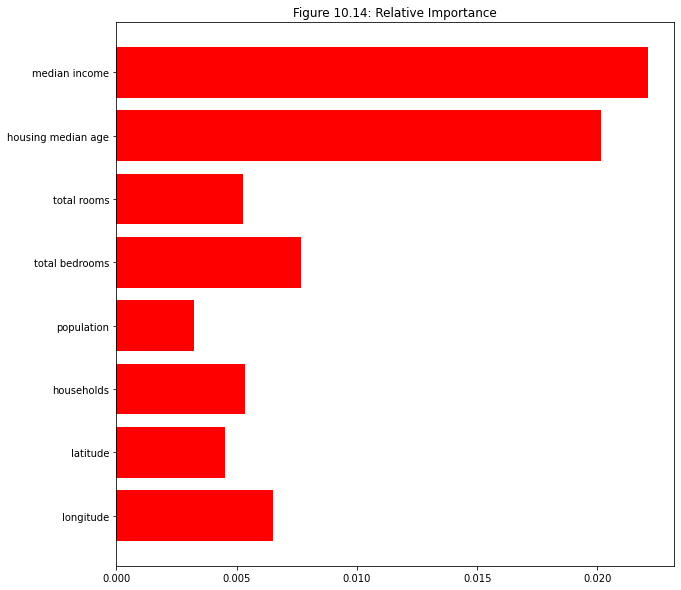

In [16]:
# Plotting Relative Importance with Random Forest m = 2
plt.figure(figsize=(10,10))
plt.barh(california_feature_names[1:len(california_feature_names)], RF_m2.feature_importances_[1:len(california_feature_names)], color = 'red')
plt.title('Figure 10.14: Relative Importance')
plt.show()

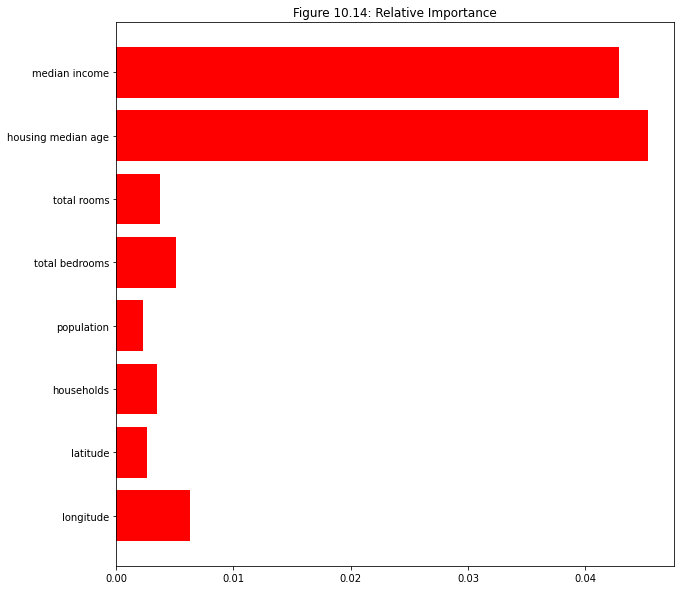

In [17]:
# Plotting Relative Importance with Random Forest m = 6
plt.figure(figsize=(10,10))
plt.barh(california_feature_names[1:len(california_feature_names)], RF_m6.feature_importances_[1:len(california_feature_names)], color = 'red')
plt.title('Figure 10.14: Relative Importance')
plt.show()

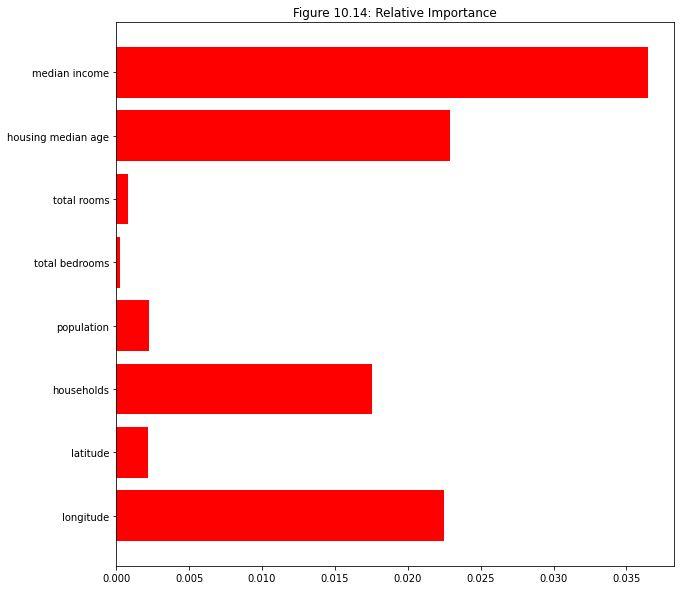

In [18]:
# Plotting Relative Importance with Gradient Boosting depth 4
plt.figure(figsize=(10,10))
plt.barh(california_feature_names[1:len(california_feature_names)], GB_depth4.feature_importances_[1:len(california_feature_names)], color = 'red')
plt.title('Figure 10.14: Relative Importance')
plt.show()

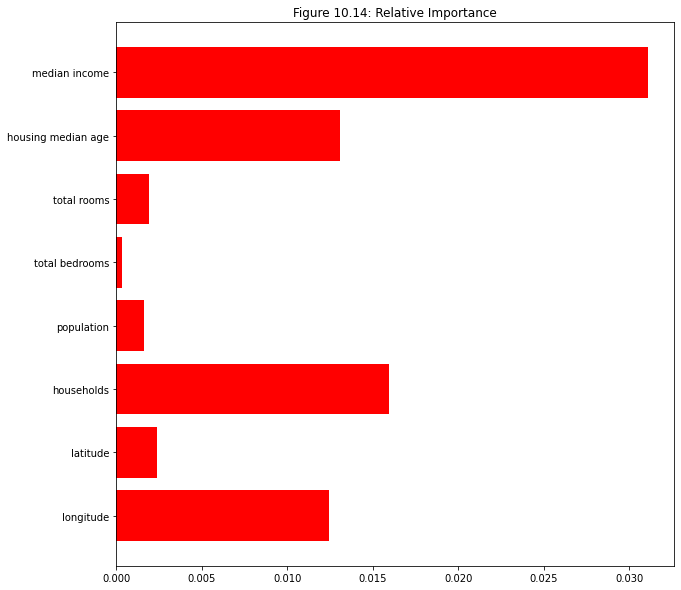

In [19]:
# Plotting Relative Importance with Gradient Boosting depth 6
plt.figure(figsize=(10,10))
plt.barh(california_feature_names[1:len(california_feature_names)], GB_depth6.feature_importances_[1:len(california_feature_names)], color = 'red')
plt.title('Figure 10.14: Relative Importance')
plt.show()

# Analysis of relative feature importance plots for California Housing Data

####Compare RF 2 to RF 6 
The random forest regression with m = 2 emphasizes median income, longitude, latitude and population in terms of relative importance. On the other hand, the random forest regression of m = 6 puts the same emphasis on longitude and latitude. It also emphasizes households. Median income still has the most importance. 

####Compare GB 4 to GB 6 
The gradient boosted tree with depth 4 puts most of the emphasis on median income, just as the random forest did, but not to the same extent. The relative importance of median income was about 0.6 with longitude and latitude having a relative importance of 0.15 and 0.14 respectively. The gradient boosted tree with depth 6 put slightly less emphasis on median income, with a relative importance slightly below 0.6. In addition, the latitude has slightly more relative importance than longitude with a greater depth.

####Compare RF to GB General 
Overall, these two regression schemes emphasized the same important features (median income, longitude, and latitude), though gradient boosting models were more sensitive to other features than random forests were.

# Crime in Communities AAE v Num_Inter Plot

In [20]:
# Import crime in communities dataset 
crime_data = pd.read_csv (r'crime.csv') # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime
feature_names = pd.read_csv (r'feature_names.csv') # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime
crime_data = crime_data.drop(crime_data.columns[0], axis=1)
display(crime_data)

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8.0,0.86451,0.56049,1.0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.030000,0.130000,0.960000,0.170000,0.060000,0.180000,0.440000,0.13000,0.940000,0.930000,0.030000,0.070000,0.100000,0.070000,0.020000,0.570000,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.90000,0.500000,0.32,0.140000,0.20
1,53.0,0.86451,0.56049,1.0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.732843,0.740588,0.492059,0.841569,0.751471,0.548922,0.446373,0.78951,0.825392,0.435392,0.467745,0.732157,0.634902,0.503039,0.407059,0.754412,0.558627,0.02,0.12,0.45,0.476176,0.750392,0.73451,0.757059,0.00,0.719804,0.67
2,24.0,0.86451,0.56049,1.0,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.732843,0.740588,0.492059,0.841569,0.751471,0.548922,0.446373,0.78951,0.825392,0.435392,0.467745,0.732157,0.634902,0.503039,0.407059,0.754412,0.558627,0.01,0.21,0.02,0.476176,0.750392,0.73451,0.757059,0.00,0.719804,0.43
3,34.0,5.00000,81440.00000,1.0,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.732843,0.740588,0.492059,0.841569,0.751471,0.548922,0.446373,0.78951,0.825392,0.435392,0.467745,0.732157,0.634902,0.503039,0.407059,0.754412,0.558627,0.02,0.39,0.28,0.476176,0.750392,0.73451,0.757059,0.00,0.719804,0.12
4,42.0,95.00000,6096.00000,1.0,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.732843,0.740588,0.492059,0.841569,0.751471,0.548922,0.446373,0.78951,0.825392,0.435392,0.467745,0.732157,0.634902,0.503039,0.407059,0.754412,0.558627,0.04,0.09,0.02,0.476176,0.750392,0.73451,0.757059,0.00,0.719804,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12.0,0.86451,0.56049,10.0,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.64,0

In [21]:
crime_features, crime_labels = clean_data(crime_data) # Normalization of features and labels is NOT necessary for this dataset
X_train, X_test, y_train, y_test = train_test_split(crime_features, crime_labels, test_size=0.2, shuffle=True)
# Remove Nan values
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
X_test = np.nan_to_num(X_test)
y_test = np.nan_to_num(y_test)

In [22]:
# Computing Absolute Error for Number of Iterations
num_iterations = 250
NE = np.linspace(1,num_iterations,num_iterations)

MAE_vec_RF_m2 = np.zeros(num_iterations)
MAE_vec_RF_m6 = np.zeros(num_iterations)
MAE_vec_GB_depth4 = np.zeros(num_iterations)
MAE_vec_GB_depth6 = np.zeros(num_iterations)

for ne in NE:
  
  ne = int(ne)

  # Random Forest with depth m = 2 (# of trees)
  RF_m2 = RandomForestRegressor(n_estimators=ne, max_features=2)

  # Random Forest with depth m = 6
  RF_m6 = RandomForestRegressor(n_estimators=ne, max_features=6)

  # Gradient Boosting with depth 4
  GB_depth4 = GradientBoostingRegressor(n_estimators=ne, max_depth=4, learning_rate=0.05)

  # Gradient boosting with depth 6
  GB_depth6 = GradientBoostingRegressor(n_estimators=ne, max_depth=6, learning_rate=0.05)

  RF_m2.fit(X_train, y_train)
  RF_m6.fit(X_train, y_train)
  GB_depth4.fit(X_train, y_train)
  GB_depth6.fit(X_train, y_train)

  y_pred_RF_m2 = RF_m2.predict(X_test)
  y_pred_RF_m6 = RF_m6.predict(X_test)
  y_pred_GB_depth4 = GB_depth4.predict(X_test)
  y_pred_GB_depth6 = GB_depth6.predict(X_test)

  MAE_vec_RF_m2[ne-1] = np.sum(np.abs(y_test - y_pred_RF_m2))/len(y_pred_RF_m2)
  MAE_vec_RF_m6[ne-1] = np.sum(np.abs(y_test - y_pred_RF_m6))/len(y_pred_RF_m6)
  MAE_vec_GB_depth4[ne-1] = np.sum(np.abs(y_test - y_pred_GB_depth4))/len(y_pred_GB_depth4)
  MAE_vec_GB_depth6[ne-1] = np.sum(np.abs(y_test - y_pred_GB_depth6))/len(y_pred_GB_depth6)


<Figure size 432x288 with 0 Axes>

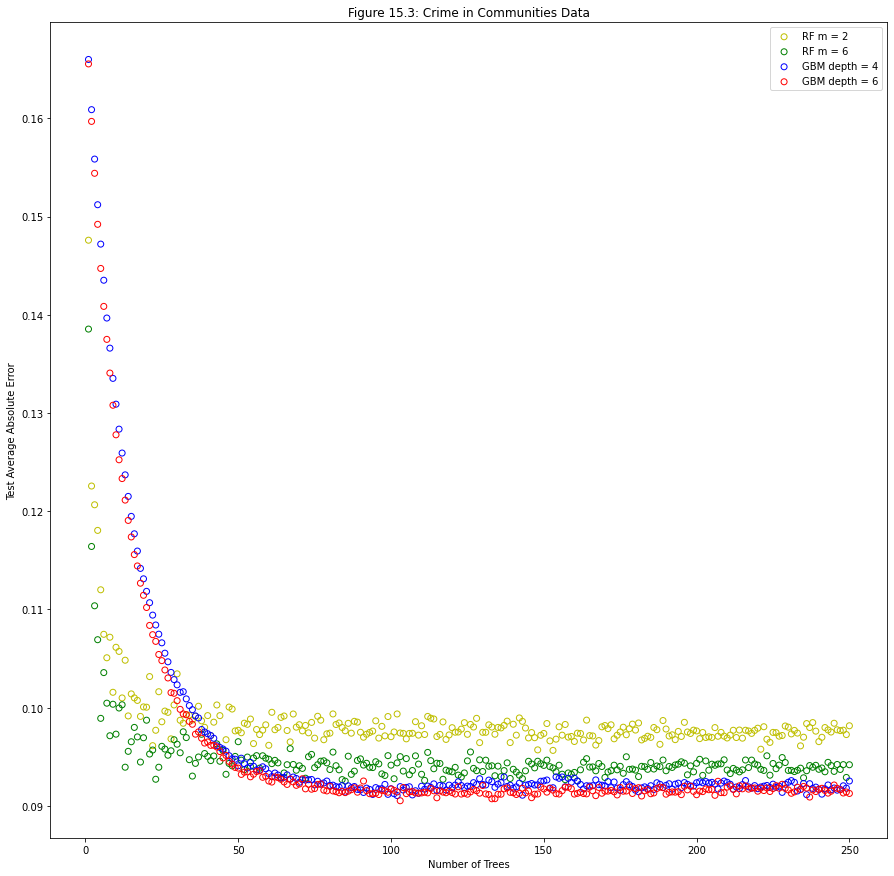

In [23]:
# Plotting Training and Testing Absolute Error
plt.figure(1)
plt.figure(figsize=(15,15))
plt.scatter(NE,MAE_vec_RF_m2,color='none',edgecolors='y')
plt.scatter(NE,MAE_vec_RF_m6,color='none',edgecolors='g')
plt.scatter(NE,MAE_vec_GB_depth4,color='none',edgecolors='b')
plt.scatter(NE,MAE_vec_GB_depth6,color='none',edgecolors='r')

plt.title('Figure 15.3: Crime in Communities Data')
plt.xlabel('Number of Trees')
plt.ylabel('Test Average Absolute Error')
plt.legend(['RF m = 2','RF m = 6', 'GBM depth = 4', 'GBM depth = 6'])
plt.show()

# Analysis of AEE v Num_Iter Plot for Crime in Communities Data

####Compare RF 2 to RF 6
The random forest regression with m = 2 converges to AAE of 0.10, while the random forest regression with m = 6 converges to AAE of 0.095. This implies that a random forest with a greater depth will produce results with less error.

####Compare GB 4 to GB 6
The gradient boosted tree with depth 6 converged to 0.09, while the gradient boosted tree with depth 4 converged to a value slightly below 0.09. It seems that the gradient boosted tree model with greater depth generated a worse model.

####Compare RF to GB general
Again, boosted models outperform forest models. The AAE for random forest was higher than it was for the gradient boosted tree, although the AAE for random forest with depth 6 was only slightly greater than the AAE for gradient boosted tree depth 6. Overall, the gradient boosted trees outperformed the random forests. The random forest would need an even greater value of m than the gradient boosted trees in order to achieve the same error.




# Crime in Communities Feature Importance Plots

In [24]:
# Random Forest with depth m = 2 (# of trees)
RF_m2 = RandomForestRegressor(n_estimators=250, max_features=2)
RF_m2.fit(X_train, y_train)

# Random Forest with depth m = 6
RF_m6 = RandomForestRegressor(n_estimators=250, max_features=6)
RF_m6.fit(X_train, y_train)

# Gradient Boosting with depth 4
GB_depth4 = GradientBoostingRegressor(n_estimators=250, max_depth=4, learning_rate=0.05)
GB_depth4.fit(X_train, y_train)

# Gradient boosting with depth 6
GB_depth6 = GradientBoostingRegressor(n_estimators=250, max_depth=6, learning_rate=0.05)
GB_depth6.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Plotting Relative Importance
crime_feature_names = np.array(feature_names.columns)
plt.figure(figsize=(20,20))
plt.barh(crime_feature_names, RF_m2.feature_importances_[0:127], color = 'red')
plt.rc('ytick', labelsize=5) 
plt.yticks(rotation=-45)
plt.title('Figure 10.14: Relative Importance')
plt.show()

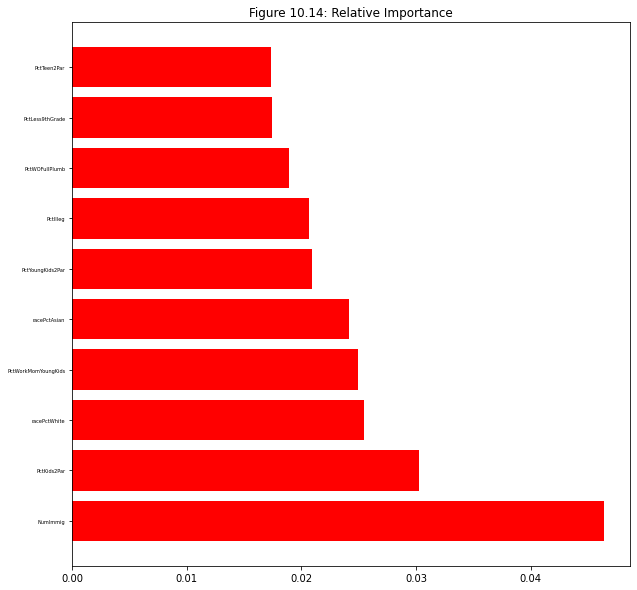

In [26]:
# Plotting 10 Most Important Features with Random Forest depth 2
sorted_feature_indices = np.argsort(RF_m2.feature_importances_) # Sort features from least to most important
sorted_feature_indices = sorted_feature_indices[::-1] # Reverse array order
# Get 10 most important features
sorted_feature_names = [''] * 10
for i in range(0,10):
  sorted_feature_names[i] = crime_feature_names[sorted_feature_indices[i]]

plt.figure(figsize=(10,10))
plt.barh(sorted_feature_names, RF_m2.feature_importances_[sorted_feature_indices[0:10]], color = 'red')
plt.rc('ytick', labelsize=30) 
plt.title('Figure 10.14: Relative Importance')
plt.show()

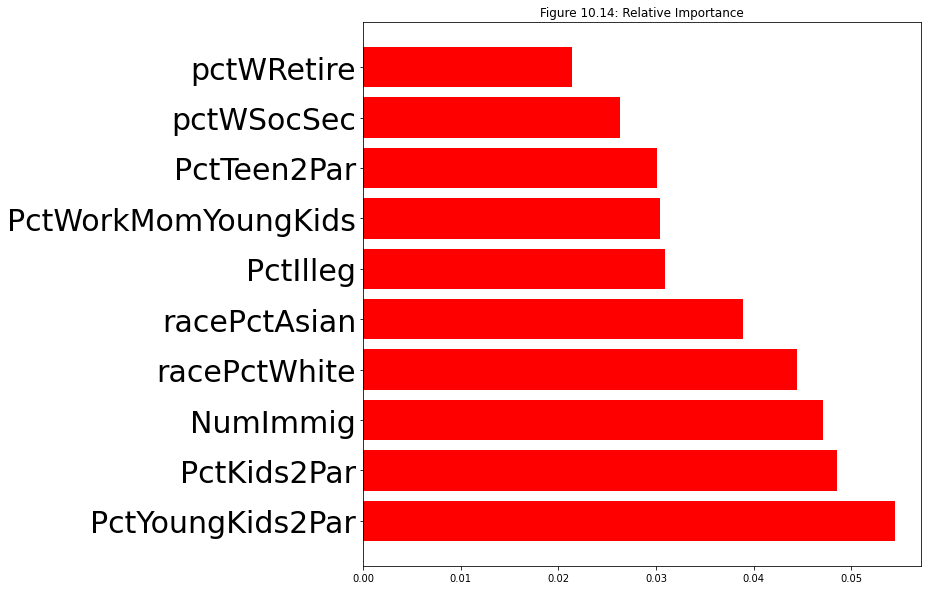

In [27]:
# Plotting 10 Most Important Features with Random Forest depth 6
sorted_feature_indices = np.argsort(RF_m6.feature_importances_) # Sort features from least to most important
sorted_feature_indices = sorted_feature_indices[::-1] # Reverse array order
# Get 10 most important features
sorted_feature_names = [''] * 10
for i in range(0,10):
  sorted_feature_names[i] = crime_feature_names[sorted_feature_indices[i]]

plt.figure(figsize=(10,10))
plt.barh(sorted_feature_names, RF_m6.feature_importances_[sorted_feature_indices[0:10]], color = 'red')
plt.rc('ytick', labelsize=20) 
plt.title('Figure 10.14: Relative Importance')
plt.show()

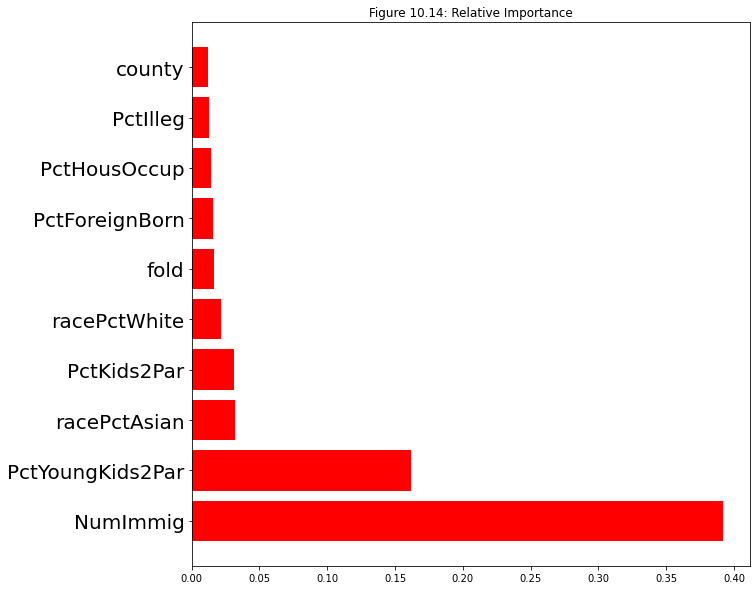

In [28]:
# Plotting 10 Most Important Features with Gradient Boosting depth 4
sorted_feature_indices = np.argsort(GB_depth4.feature_importances_) # Sort features from least to most important
sorted_feature_indices = sorted_feature_indices[::-1] # Reverse array order
# Get 10 most important features
sorted_feature_names = [''] * 10
for i in range(0,10):
  sorted_feature_names[i] = crime_feature_names[sorted_feature_indices[i]]

plt.figure(figsize=(10,10))
plt.barh(sorted_feature_names, GB_depth4.feature_importances_[sorted_feature_indices[0:10]], color = 'red')
plt.rc('ytick', labelsize=20) 
plt.title('Figure 10.14: Relative Importance')
plt.show()

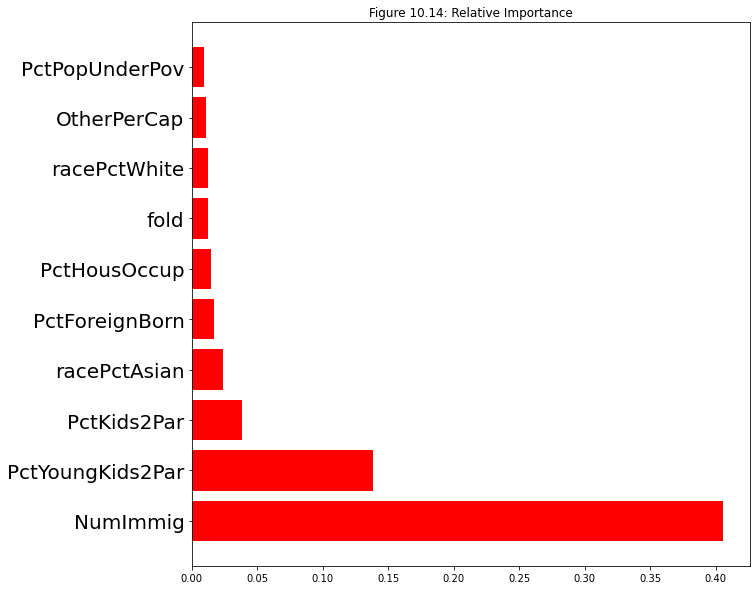

In [29]:
# Plotting 10 Most Important Features with Gradient Boosting depth 6
sorted_feature_indices = np.argsort(GB_depth6.feature_importances_) # Sort features from least to most important
sorted_feature_indices = sorted_feature_indices[::-1] # Reverse array order
# Get 10 most important features
sorted_feature_names = [''] * 10
for i in range(0,10):
  sorted_feature_names[i] = crime_feature_names[sorted_feature_indices[i]]

plt.figure(figsize=(10,10))
plt.barh(sorted_feature_names, GB_depth6.feature_importances_[sorted_feature_indices[0:10]], color = 'red')
plt.rc('ytick', labelsize=20) 
plt.title('Figure 10.14: Relative Importance')
plt.show()

# Analysis of relative feature importance plots for Crime in Communities Data

####Compare RF 2 to RF 6
The random forest regression with m = 2 shows the greatest emphasis on the number of immigrants, coming in at about 0.75. The next highest relative importance is percent young kids to parents at about 0.2 and only a couple other features with a non-negligible relative importance. The random forest with m = 6 has a smaller relative importance for number of immigrants at about 0.48 and a lower relative importance for percent young kids to parents at about 0.15. There are also a few additional features that show noticeable relative importances with m = of 6.

####Compare GB 4 to GB 6
The gradient boosted tree with depth 4 had the highest relative importance to the number of immigrants at 0.37 followed closely by percent young kids 2 parents at 0.20. The rest of the top ten important features are all below 0.05. With a gradient boosted tree with depth 6, the relative importance of the number of immigrants increased to 0.45 and the relative importance of percent young kids to parents went down to 0.10. The rest of the top ten importance features also decreased, and some were different than those that were found to be important with the gradient boosted tree with depth 4.

####Compare RF to GB general
Random forest and gradient boosting models select the same important features, though the order of some of the secondarily important features does vary among the models. In general, the gradient boosted models allocate more importance to the secondarily important features than the random forest models do. 

